# Introduction

In this lab, we will explore how boosting can improve prediction accuracy on a multi-class problem. We will use a dataset constructed by taking a ten-dimensional standard normal distribution and defining three classes separated by nested concentric ten-dimensional spheres such that roughly equal numbers of samples are in each class.

We will compare the performance of the SAMME and SAMME.R algorithms. SAMME.R uses the probability estimates to update the additive model, while SAMME uses the classifications only.

# Import Required Libraries

We will start by importing the required libraries, including **make_gaussian_quantiles** and **accuracy_score** from **sklearn.datasets**, **AdaBoostClassifier**, **DecisionTreeClassifier** from **sklearn.ensemble**, and **matplotlib.pyplot**

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the Dataset

We will use the **make_gaussian_quantiles** function from **sklearn.datasets** to generate a dataset. This function generates isotropic Gaussian and adds separation between classes to make the problem harder.

In [2]:
X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=42
)

# Split the Dataset

We will split the dataset into training and testing sets using the first 3000 samples for training and the remaining samples for testing.

In [3]:
n_split = 3000
X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

# Create and Train the Models

We will create two AdaBoost models, one using SAMME and the other using SAMME.R. Both models will use DecisionTreeClassifier with a max depth of 2 and 300 estimators.

In [4]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

# Test the Models

We will test the models and calculate the test error of each model after each boosting iteration.

In [5]:
real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

# Plot the Results

We will plot the test error, classification error, and boost weight of each model.

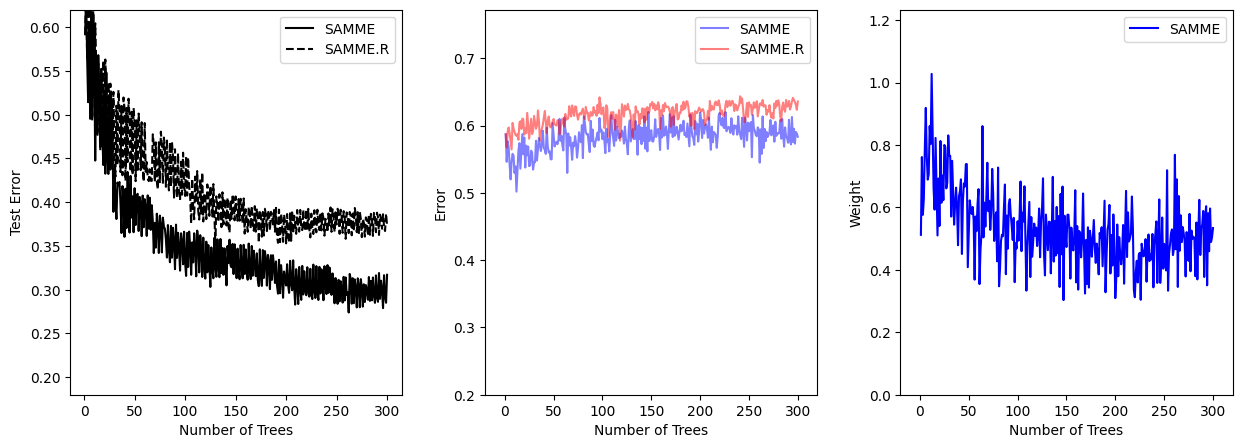

In [6]:
n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

Summary

In this lab, we explored how boosting can improve prediction accuracy on a multi-class problem. We used a dataset constructed by taking a ten-dimensional standard normal distribution and defining three classes separated by nested concentric ten-dimensional spheres. We compared the performance of the SAMME and SAMME.R algorithms and plotted the test error, classification error, and boost weight of each model. The results showed that SAMME.R typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.